In [3]:
# Just some imports
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/tomasz_bednarski/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


ModuleNotFoundError: No module named 'matplotlib'

# MNIST dataset

MNIST is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST database consists of 70000 grayscale digits, where each digit is an image with a size of 28x28 pixels.

The datased is splitted into three subsets:


1. Train set -- 55k images
2. Test set -- 10k images
3. Validation set -- 5k images


TensorFlow package has already built-in functions to deal with the MNIST dataset. Below one can find how to use it.


In [4]:
# Function for plotting the MNIST images
def plot(image):
    plt.axis('off')
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()

In [5]:
# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Now we can easily deal with the MNIST data, by using:


1. mnist.train.images
2. mnist.test.images
3. mnist.validation.images

In [6]:
# Print the shapes of images from each subset
print ("IMAGES:")
print (mnist.train.images.shape)
print (mnist.test.images.shape)
print (mnist.validation.images.shape)

# Print the shapes of labels from each subset
print ("LABELS:")
print (mnist.train.labels.shape)
print (mnist.test.labels.shape)
print (mnist.validation.labels.shape)

IMAGES:
(55000, 784)
(10000, 784)
(5000, 784)
LABELS:
(55000, 10)
(10000, 10)
(5000, 10)


As we can see, every image is now a 784 dimensional vector, as by default it is reshaped from the matrix of a size 28x28 pixels.

Also we see that labels are 10 dimensional vectors, what is caused by the fact that they are in one-hot-encoding form.

In [7]:
# Print the vector of sample training image
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

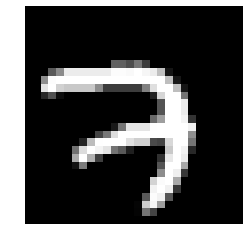

In [7]:
# Plot the sample training image
plot(mnist.train.images[0])

In [8]:
# Print the label of sample training image
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

# Convolutional Neural Network for MNIST classification

## Building the network

We will create the CNN for digits classification, with the following architecture:


1.   First convolutional layer, that maps one grayscale image to 32 feature maps.
2.   Second convolutional layer, that maps 32 feature maps to 64 feature maps.
3.   Fully connected layer 1, that maps our 64 feature maps into one layer, with 1024 features.
4.   Fully connected layer 2, that maps the 1024 features to 10 classes, one for each digit

We will use filters with width and height equal to 5.


#### At the beggining we have to create some auxiliary functions.

In [10]:
def get_weight_variable(shape):
  """
  Write a function, that will return the tf.Variable of specified shape, with
  coefficients initialized by random, sampled from a normal distribution with
  mean = 0 and sd = 0.02
  """
  init = tf.random_normal(shape, stddev=0.02)
  return tf.Variable(init)
#  pass


def conv2d(x, W):
  """
  Write a function, that will return the result of a convolution between
  a tensor x and a weight vector W. We recommend using strides equal to 1
  in every direction and use SAME padding.
  """
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME') # 4 dim to batch
#  pass


def max_pool_2x2(x):
  """
  Write a function, that will return the result of max pooling operation done
  on a tensor x, that will reduce the size of inner image. 
  The length and width of a pooling layer window should be equal to 2.
  """
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                        strides=[1, 2, 2, 1], padding='SAME')
#   pass

#### Create placeholders for training data, remember about a propper shape for training images (in mnist.train.images every digit is a 784D vector) and labels (In training dataset labels are in one-hot-encoding form).

In [11]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
#x = 
#y = 

#### Reshape the x vector into a rank 4 tensor with shapes: [batch_size, rows, columnss, colors/filters]. Keep in mind, that we should have 28x28 image, with only one color (as the image is in grayscale) and that batch size will be given later.

In [12]:
x_image = tf.reshape(x, [-1, 28, 28, 1]) # [b_size, rows, cols, colors/filters]
#x_image = 

#### Create first convolutional layer, that will map one grayscale image into 32 feature maps. To do so, we will use 32 convolutional filters with sizes 5x5x1.

In [13]:
""" Initialize weights matrix W """
W_conv1 = get_weight_variable([5, 5, 1, 32]) # 32 filters with size 5x5x1  # 
#W_conv1 = # 32 filters with size 5x5x1

""" Initialize biases vector """
b_conv1 = get_weight_variable([32])
#b_conv1 = # 32 filters

In [14]:
""" Apply convolution operation between image and weights, then add bias and apply relu function """
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # [batch_size, 28, 28, 32]   # relu - dodanie formy nieliniowosci
#h_conv1 = # [batch_size, 28, 28, 32]

""" Apply max pooling operation on h_conv1 """
h_pool1 = max_pool_2x2(h_conv1) # [batch_size, 14, 14, 32]
#h_pool1 = # [batch_size, 14, 14, 32]

#### Create second convolutional layer, that will map resulted 32 feature maps into 64 features maps. To do so, we will use 64 convolutional filters with sizes 5x5x32.

In [15]:
""" Initialize weights matrix W """
W_conv2 = get_weight_variable([5, 5, 32, 64]) # 64 filters with size 5x5x32
#W_conv2 =  # 64 filters with size 5x5x32

""" Initialize biases vector b """
b_conv2 = get_weight_variable([64])
#b_conv2 = # 64 filters

In [16]:
""" Apply convolution operation between image and weights, then add bias and apply relu function """
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # [batch_size, 14, 14, 64] # relu adding non-linearity
#h_conv2 = 

""" Apply max pooling operation on h_conv1 """
h_pool2 = max_pool_2x2(h_conv2) # [batch_size, 7, 7, 64]
#h_pool2 = 

#### Create first fully connected layer -- after 2 rounds of downsampling, our 28x28 image is down to 7x7x64 feature maps -- now map this to 1024 features, with using of fully connected layer, with ReLU activation function and dropout.

In [17]:
""" Initialize weights matrix W, which maps 7x7x64 feature maps into one layer with 1024 features """
W_fc1 = get_weight_variable([7 * 7 * 64, 1024])
#W_fc1 = # 7x7x64 -> 1024

""" Initialize biases vector b """
b_fc1 = get_weight_variable([1024])
#b_fc1 = # 1024 weights

""" Reshape the result from the last convolutional layer from [batch_size, 7, 7, 64] to [batch_size, 7*7*64],
    as this is the shape that is expected by the weight matrix W_fc1. """
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
#h_pool2_flat = # 7*7*64

In [18]:
""" Apply matrix multiplication between image and weights, then add bias and apply relu function """
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#h_fc1 = # [batch_size, 1024]

In [19]:
""" Create placeholder for the dropout probability """
keep_prob = tf.placeholder(tf.float32)
#keep_prob =

""" Apply dropout with probability = keep_prob """
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#h_fc1_drop = 

#### Create the second convolutional layer, that maps 1024 features from the last layer into 10 classes, one for each digit.

The softmax function applied on the result of this layer *y_conv* will give us the probabilities for every class that our convolutional neural network gives for the given image. Although we won't use this function at the moment, as this could be numerically unstable. We will handle this problem during the training step. At the moment we want to keep only logits.

In [20]:
""" Initialize weights matrix W, which maps 1024 features into one layer with 10 features """
W_fc2 = get_weight_variable([1024, 10])
#W_fc2 = # 1024 -> 10

""" Initialize biases vector b """
b_fc2 = get_weight_variable([10])
#b_fc2 = # 10 weights

In [21]:
""" Apply matrix multiplication between image and weights, then add bias to get logits """
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2 
#y_conv = # [batch_size, 10]

## Network training

We will now try to train our network. For this purpose we have to define the loss function, cross entropy in our example and optimizer, in our example we will use Adam.

#### Define the loss function and optimizer

In [22]:
""" Define the cross entropy loss function
    Remember that in the return from our network - 'y_conv', we didn't use the softmax function to overcome problems
    with numerical stability, that's why we should use now the function named softmax_cross_entropy_with_logits, that
    is more numerical stable. """
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv)
#cross_entropy = ###
cross_entropy = tf.reduce_mean(cross_entropy)

In [23]:
""" Define the Adam optimizer with parameter equal to 1e-4, that will minimize our cross_entropy loss function """
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#train_step =

#### Check whether our network returns correct predictions and calculate the accuracy

In [24]:
""" Create a vector that tells us, whether the predictions from our net - y_conv
    are equal to the correct digit labels - y. """
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
# correct_prediction = ###
correct_prediction = tf.cast(correct_prediction, tf.float32)

""" Calculate the accurracy of correct predictions """
accuracy = tf.reduce_mean(correct_prediction)
#accuracy = 

#### Training the network

The following code will train our network with using of our predefined Adam optimizer, based on the batch size equal to 64 and with 20000 steps.

In [25]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(2000):
    # Get the batch with 64 images from the MNIST training set
    batch = mnist.train.next_batch(64)
    
    # Fill data into placeholders
    train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
    
    # Print the validation accuracy every 100 steps
    if i % 100 == 0:
      validation_accuracy = accuracy.eval(feed_dict={
          x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1.0})
      print('step: {}, validation accuracy: {}'.format(i, round(validation_accuracy,3)))
    

  # Print the test set accuracy
  print('test accuracy: {}'.format(round(accuracy.eval(feed_dict={
      x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}),3)))

step: 0, validation accuracy: 0.09799999743700027
step: 100, validation accuracy: 0.7950000166893005
step: 200, validation accuracy: 0.8849999904632568
step: 300, validation accuracy: 0.9150000214576721
step: 400, validation accuracy: 0.9290000200271606
step: 500, validation accuracy: 0.9359999895095825
step: 600, validation accuracy: 0.9419999718666077
step: 700, validation accuracy: 0.9509999752044678
step: 800, validation accuracy: 0.9490000009536743
step: 900, validation accuracy: 0.9589999914169312
step: 1000, validation accuracy: 0.9620000123977661
step: 1100, validation accuracy: 0.9660000205039978
step: 1200, validation accuracy: 0.9649999737739563
step: 1300, validation accuracy: 0.9670000076293945
step: 1400, validation accuracy: 0.9679999947547913
step: 1500, validation accuracy: 0.9739999771118164
step: 1600, validation accuracy: 0.9750000238418579
step: 1700, validation accuracy: 0.9769999980926514
step: 1800, validation accuracy: 0.9760000109672546
step: 1900, validation 

KeyboardInterrupt: 

# Generative adversarial networks

Our GANs will be composed of two neural networks: Discriminator and Generator. The role of the discriminator is to classify whether the given image is real or generated by generator and the role of the generator is to generate image good enough to cheat the discriminator.

To train GANs we will use the MNIST dataset.


## Create Discriminator

We will use the convolutional neural network, as the discriminator. We can reuse some parts of code that we already have.


Our discriminator network will have the following architecture:

1.  First convolutional layer, that maps one grayscale image to 16 feature maps.
2.  Second convolutional layer, that maps 16 feature maps to 64 feature maps.
3.  Third convolutional layer, that maps 64 feature maps to 256 feature maps.
4.  Fully connected layer, that maps our 256 feature maps into output layer, with 2 classes (one for real and one for generated images).

In our network we won't use the max pooling operation - instead we will use the stride of size 2 in the width and height directions, what will divide them in the input image by two.


#### Initialize all weights and biases that will be used by our discriminator

In [0]:
""" Initialize weights matrix W and biases vector b, that will be used by 
    the first convolutional layer -> 16 filters with size 5x5x1 """
# d_W1 = get_weight_variable([5, 5, 1, 16]) # 16 filters with size 5x5x1
# d_b1 = get_weight_variable([16]) 
d_W1 = # 16 filters with size 5x5x1
d_b1 = 


""" Initialize weights matrix W and biases vector b, that will be used by 
    the second convolutional layer -> 64 filters with size 5x5x16 """
# d_W2 = get_weight_variable([5, 5, 16, 64]) # 64 filters with size 5x5x16 # 16 liczba filtrow w poprz kroku sieci (filtry wrzucamy w 3-ci wymiar)
# d_b2 = get_weight_variable([64])
d_W2 = # 64 filters with size 5x5x16
d_b2 = 


""" Initialize weights matrix W and biases vector b, that will be used by 
    the third convolutional layer -> 256 filters with size 5x5x64 """
# d_W3 = get_weight_variable([5, 5, 64, 256]) # 256 filters with size 5x5x64
# d_b3 = get_weight_variable([256])
d_W3 = # 256 filters with size 5x5x64
d_b3 = 


""" Initialize weights matrix W and biases vector b, that will be used by 
    the output fully connected layer -> from 4096 features to 2 output classes """
# d_W4 = get_weight_variable([4096, 1]) # from 4096 to 1 feature
# d_b4 = get_weight_variable([1])
d_W4 = # from 4096 to 1 feature
d_b4 = 

#### Create the discriminator network

In [0]:
def discriminator(x):
  
  """ Create first convolutional layer - remember that we use stride 2 in the width and height directions,
      what divide them in the input image by two, please use SAME padding.
      Apply convolution operation and then ReLU function
      Dyskryminator to siec konwolucyjna podobna jak byla powyzej, stride 2
      """
#   x = tf.nn.conv2d(x, d_W1, [1, 2, 2, 1], padding='SAME') # [batch_size, 14, 14, 16]  
#   x = tf.nn.relu(x + d_b1) 
  x = # [batch_size, 14, 14, 16]
  x = 
  
  
  """ Create second convolutional layer - remember that we use stride 2 in the width and height directions,
      what divide them in the input image by two, please use SAME padding.
      Apply convolution operation and then ReLU function"""
#   x = tf.nn.conv2d(x, d_W2, [1, 2, 2, 1], padding='SAME') # [batch_size, 7, 7, 64]
#   x = tf.nn.relu(x + d_b2)
  x = # [batch_size, 7, 7, 64]
  x = 
  
  
  """ Create third convolutional layer - remember that we use stride 2 in the width and height directions,
      what divide them in the input image by two, please use SAME padding.
      Apply convolution operation and then ReLU function"""
#   x = tf.nn.conv2d(x, d_W3, [1, 2, 2, 1], padding='SAME') # [batch_size, 4, 4, 256]
#   x = tf.nn.relu(x + d_b3) 
  x = # [batch_size, 4, 4, 256]
  x = 
  
  
  """ Reshape the input, into 4*4*256 = 4096 dimensions, so as we could use it in the last layer of our network """
#   x = tf.reshape(x, [-1, 4*4*256]) 
  x = 

  
  """ Create fully connected layer of our network, multiply the x by d_W4 and add the proper batch,
      this will give us the logits of our discriminator network """
#   D_logit = tf.matmul(x, d_W4) + d_b4 # Fully connected layer from [b_size, 4096] to [b_size, 2]
  D_logit = # Fully connected layer from [b_size, 4096] to [b_size, 2]
  
  
  """ Create also probabilities returned by our network, just apply the softmax function on logits """
#   D_prob = tf.nn.sigmoid(D_logit)
  D_prob = 

  return D_prob, D_logit

## Create Generator

Generator network will create the 28x28 image, from the initial 100D vector, sampled from a normal distribution, with using of the transpose convolution operation (https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d).


Our generator network will have the following architecture:


1.  Fully connected layer, that maps our initial random 100 dimensions into 4096 features (4x4 images with 256 channels).
2.  First transpose convolutional layer, that maps 4x4x256 images into 7x7 images with 64 channels.
3.  Second transpose convolutional layer, that maps 7x7x64 images into 14x14 images with 16 channels.
4.  Final transpose convolutional layer, that maps 14x14x16 images into 28x28 grayscale images.


#### Initialize all weights and biases that will be used by our generator

In [0]:
""" Initialize weights matrix W and biases vector b, that will be used by 
    the input fully connected layer -> from 100 random generated features into 4096 dimentions,
    which after reshaping will give us the 4x4x256 image """
# g_W1 = get_weight_variable([100, 4096]) # from 100 to 4096 features
# g_b1 = get_weight_variable([4096])
g_W1 = # from 100 to 4096 features
g_b1 = 


""" Initialize weights matrix W and biases vector b, that will be used by 
    the first transpose convolutional layer -> 64 transpose_conv filters with size 5x5x256 """
# g_W2 = get_weight_variable([5, 5, 64, 256]) # 64 transpose_conv filters with size 5x5x256
# g_b2 = get_weight_variable([64])
g_W2 = # 64 transpose_conv filters with size 5x5x256
g_b2 = 


""" Initialize weights matrix W and biases vector b, that will be used by 
    the second transpose convolutional layer -> 16 transpose_conv filters with size 5x5x64 """
# g_W3 = get_weight_variable([5, 5, 16, 64]) # 16 transpose_conv filters with size 5x5x64
# g_b3 = get_weight_variable([16])
g_W3 = # 16 transpose_conv filters with size 5x5x64
g_b3 =


""" Initialize weights matrix W and biases vector b, that will be used by 
    the third transpose convolutional layer -> 1 transpose_conv filter with size 5x5x16 """
# g_W4 = get_weight_variable([5, 5, 1, 16]) # 1 transpose_conv filter with size 5x5x16
# g_b4 = get_weight_variable([1])
g_W4 = # 1 transpose_conv filter with size 5x5x16
g_b4 = 

#### Create the generator network

In [0]:
def generator(z):

  # Fully connected layer from [b_size, 100] to [b_size, 4096]
#   z = tf.matmul(z, g_W1) + g_b1
#   z = tf.nn.relu(z)
#   z = tf.nn.dropout(z, g_keep_prob)
#   z = tf.reshape(z, [-1, 4, 4, 256]) # reshape from [b_size, 4096] to [b_size, 4, 4, 256]
  z = 
  z = # reshape from [b_size, 4096] to [b_size, 4, 4, 256]

  
  """ Create first transpose convolutional layer, please use SAME padding.
      This layer will almost double the size of width and height of our image - 
      instead of 4x4x256, the image size will now be equal to 7x7x64.
      Remember that during the convolution, we used stride 2 in the width and height directions.
      Apply convolution operation, ReLU function and then dropout with probability equal to g_keep_prob """
#   z = tf.nn.conv2d_transpose(z, g_W2, [batch_size, 7, 7, 64], [1, 2, 2, 1], padding='SAME') # 7x7x64 image
#   z = tf.nn.relu(z + g_b2)
#   z = tf.nn.dropout(z, g_keep_prob)
  z = # 7x7x64 image

  
  """ Create second transpose convolutional layer, please use SAME padding.
      This layer will double the size of width and height of our image - 
      instead of 7x7x64, the image size will now be equal to 14x14x16.
      Remember that during the convolution, we used stride 2 in the width and height directions.
      Apply convolution operation, ReLU function and then dropout with probability equal to g_keep_prob """
#   z = tf.nn.conv2d_transpose(z, g_W3, [batch_size, 14, 14, 16], [1, 2, 2, 1], padding='SAME') # 14x14x16 image
#   z = tf.nn.relu(z + g_b3)
#   z = tf.nn.dropout(z, g_keep_prob)
  z = # 14x14x16 image

  
  """ Create final transpose convolutional layer, please use SAME padding.
      This layer will double the size of width and height of our image - 
      instead of 14x14x16, the image size will now be equal to 28x28x1.
      Remember that during the convolution, we used stride 2 in the width and height directions.
      Apply convolution operation, don't use ReLU function nor dropout as this is the final layer """
#   z = tf.nn.conv2d_transpose(z, g_W4, [batch_size, 28, 28, 1], [1, 2, 2, 1], padding='SAME') # 28x28x1 image
  z = # 28x28x1 image

  
  """ Use the sigmoid function on the result of our transpose convolutions, to get the final image,
      after applying sigmoid function we obtain values between 0 and 1, just as in the real MNIST samples """
#   G_prob = tf.nn.sigmoid(z + g_b4)
  G_prob = 

  return G_prob

## GAN training

We will now try to train our networks. For this purpose we have to define loss functions and optimizers for both Generator and Discriminator.

#### Defining some auxiliary functions.

In [0]:
def sample_Z(m, n):
  """
  Write a function, that will return the tf.Variable of shape [m, n], with
  coefficients initialized by random, sampled from a normal distribution.
  """
#   return np.random.normal(size=[m, n], scale = 1)
  pass

#### Defining some constants and placeholders

In [28]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# nie uzywamy identyfikatora, bo nie musimy, jezeli trudniejsze obrazki, to ostatni wymiar powiinismy zwiekszyc o tyle razy ile 
# klas i wypelniamy 0 lub 1 w celu identyfikacji klasy

# Constants
batch_size = 64
Z_dim = 100 # dimension of the random initialized variable, that will be used by the generator
# wektor wejscia do generatora (szum z rnorm)

# Discriminator 
X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1]) # placeholder for the variable with the real MNIST images

# Generator
Z = tf.placeholder(tf.float32, shape=[None, 100]) # placeholder for the random initialized variable, that will be used by the generator
g_keep_prob = 0.9 # dropout probability  # nie da sie ustawic ile zostanie zapomnianych

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Generating the data by generator and calculating probabilities and logits by discriminator

In [0]:
""" Use generator to generate the image based on the given random tensor Z """
# G_sample = generator(Z)
G_sample = 


""" Use discriminator to get the probabilities and logits based on the real images X """
# D_real, D_logit_real = discriminator(X)
D_real, D_logit_real = 


""" Use discriminator to get the probabilities and logits based on the generated images G_sample """
# D_fake, D_logit_fake = discriminator(G_sample)
D_fake, D_logit_fake =

#### Define the loss function and optimizer of the discriminator

The loss function of the discriminator consists of two parts. 



1.   First part tells us how our discriminator is good in classifying real examples. For this purpose we are calculating the loss function based on the true examples, comming from the real MNIST dataset. These probabilities should be as high as possible. 
2.   Second part tells us how our discriminator is good in classifying false, generated examples. For this purpose we are calculating the loss function based on the generated examples, comming from the generator. These probabilities should be as low as possible.

In [0]:
eps = 1e-5

""" Define the cross entropy loss function of our generator
    Remember that the discriminator network returns probabilities and logits and during the training
    we should use the second one, to overcome problems with numerical stability.
    We should use now the function named softmax_cross_entropy_with_logits, that
    is more numerical stable. """

""" Calculate the first part of discriminator loss function - loss based on the real examples """
# D_loss_real = tf.reduce_mean(-tf.log(D_real + eps))
D_loss_real = 


""" Calculate the second part of discriminator loss function - loss based on the generated examples """
# D_loss_fake = tf.reduce_mean(-tf.log(1 - D_fake + eps))
D_loss_fake = 


""" Loss of the discriminator network """
D_loss = D_loss_real + D_loss_fake


""" Define the Adam optimizer with parameters equal to learning_rate=0.0002, beta1=0.5, that will minimize our cross_entropy loss function.
    We also should use the var_list = [d_W1, d_W2, d_W3, d_W4, d_b1, d_b2, d_b3, d_b4] during the training
 #   it tells which weighst should be changed. Without that we would change weigts of generator for discriminator i vice versa
 """
# D_solver = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(D_loss, var_list=[d_W1, d_W2, d_W3, d_W4, d_b1, d_b2, d_b3, d_b4])
D_solver =

#### Define the loss function and optimizer of the generator

In [0]:
""" Define the cross entropy loss function of our generator
    Remember that the discriminator network returns probabilities and logits and during the training
    we should use the second one, to overcome problems with numerical stability.
    We should use now the function named softmax_cross_entropy_with_logits, that
    is more numerical stable. """
# G_loss = tf.reduce_mean(-tf.log(D_logit_fake + eps))
G_loss = 


""" Define the Adam optimizer with parameters equal to learning_rate=0.0002, beta1=0.5, that will minimize our cross_entropy loss function.
    We also should use the var_list = [g_W1, g_W2, g_W3, g_W4, g_b1, g_b2, g_b3, g_b4] during the training """
# G_solver = tf.train.AdamOptimizer(0.0002, beta1=0.5).minimize(G_loss, var_list=[g_W1, g_W2, g_W3, g_W4, g_b1, g_b2, g_b3, g_b4])
G_solver =

#### Training GANs

The following code will train our networks with using of our predefined Adam optimizers, based on the batch size equal to 64 and with 20000 steps.

One can see how generator is learning how to create nice digits during the training.

In [37]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())  # wywolanie wiecej niz 1 func - d_solver i d_loss
  G_loss_epoch=0
  D_loss_epoch=0

  for i in range(1, 2000):
    
    images_batch = mnist.train.next_batch(batch_size)[0].reshape(-1,28,28,1)
    
    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: images_batch, Z: sample_Z(batch_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(batch_size, Z_dim)})

    G_loss_epoch += G_loss_curr
    D_loss_epoch += D_loss_curr

    if i % 750 == 1:

      print('Epoch: {}'.format(i//750))
      print('G_loss: {:.4}'.format(G_loss_epoch/750))
      print('D loss: {:.4}'.format(D_loss_epoch/750))
      
      G_loss_epoch=0
      D_loss_epoch=0

      samples = sess.run(G_sample, feed_dict={Z: sample_Z(batch_size, Z_dim)})
      for i in range(3):
        plot(samples[i])

KeyboardInterrupt: ignored